<a href="https://colab.research.google.com/github/Melikakmm/CLPBgroup17/blob/main/Exercise_4/Question_1(a).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data generation with different N :

In [ ]:
pip install tsfresh

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
from tsfresh import extract_features

from xgboost import XGBClassifier, plot_tree

%run /content/plot.py

In [2]:

np.random.seed(12345)


jump = lambda drift, stdev: int(np.random.normal(drift,stdev))

for i in range(10):
    print(jump(5,50))


def pattern(i,z,a):
    return int(a*np.sin((np.pi*i)/z))

-5
28
-20
-22
103
74
9
19
43
67


In [3]:
# random seed for reproducibility
np.random.seed(12345)

# pattern parameters: Z=nr of steps, A=amplitude
Z=12
A=500

# size of each sample of the timeseries
L=60
# step parameters: introduce small positive bias 
DX = 50
bias = 5
n = [20, 50, 100, 150, 200, 250, 300, 400, 500]



for N in [20, 50, 100, 150, 200, 250, 300, 400, 500]:
          globals()['y_{}'.format(N)] = [0] * N
          globals()['x_{}'.format(N)] = [[0] * L for i in range(N)]

          for i in range(N):
              if i>0:
                  globals()['x_{}'.format(N)][i][0] = globals()['x_{}'.format(N)][i-1][-1] + jump(bias,DX)
              
              for j in range(1,L):
                  globals()['x_{}'.format(N)][i][j] = globals()['x_{}'.format(N)][i][j-1] + jump(bias,DX)
                  
              globals()['y_{}'.format(N)][i] = i % 3
              if globals()['y_{}'.format(N)][i]>0:
                  j0 = np.random.randint(0,L-1-Z)
                  sign = 3-2*globals()['y_{}'.format(N)][i]
                  for j in range(Z):
                      globals()['x_{}'.format(N)][i][j0+j] += sign*pattern(j,Z,A)








    

#Show_data(x,L,"original data")

#print(len(x))

for N in n:
  globals()['x_{}'.format(N)] = np.array(globals()['x_{}'.format(N)])
  globals()['y_{}'.format(N)] = np.array(globals()['y_{}'.format(N)])

print(x_20)
print(y_20)

[[   0   -5   23 ...  163  169  211]
 [ 183  231  235 ...  623  619  657]
 [ 580  623  678 ...  804  789  732]
 ...
 [4446 4459 4404 ... 4692 4696 4716]
 [4708 4725 4788 ... 5375 5381 5360]
 [5340 5270 5299 ... 4722 4772 4746]]
[0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1]


In [5]:
# we did not use the rescaling data, but we put here anyways


#def RESCALE(x, N):
#  for i in range(0, N):
#    for l in range(0, L):
#      xm = np.mean(x[i])
#      x[i][l] = x[i][l]-xm
#      x = x / np.var(x)
#  return  


In [6]:
#for N in n:
#  RESCALE(globals()['x_{}'.format(N)], N)



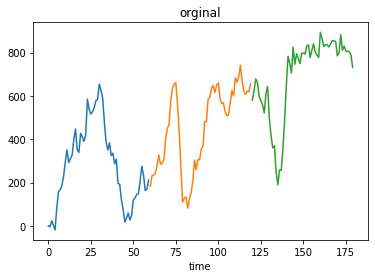

In [4]:
Show_data(x_20, L, 'orginal')


In [5]:
#we added an extra attribute to get_df function in order to involve N too


def get_df(x, N):
    
    #N = #samples, t = timesteps
    N, t = x.shape[0], x.shape[1]
    #build id columns
    id_col = np.repeat(np.arange(N),t)
    #build time columns
    time_col = np.tile(np.arange(t),N)
    #build var columns
    x_col = x.flatten()
      
    #build dict for df
    x_dict = {'id':id_col,'time':time_col,'value':x_col}
        
    #return dataframe
    return pd.DataFrame(x_dict)

In [6]:
#the DataFrames are df_N for N samples

for N in n:
  globals()['df_{}'.format(N)] = get_df(globals()['x_{}'.format(N)], N)

In [7]:
#for example:
df_20

,id,time,value
0,0,0,0
1,0,1,-5
2,0,2,23
3,0,3,3
4,0,4,-19
...,...,...,...
1195,19,55,4754
1196,19,56,4734
1197,19,57,4722
1198,19,58,4772


In [8]:
for N in n:  
   globals()['x_features_{}'.format(N)] = extract_features(
                            globals()['df_{}'.format(N)], #our dataframe
                            column_id='id', #sample id, from 0 to N
                            column_sort='time', #timestep, from 0 to t
                            column_kind=None, #we have only one feature
                            column_value='value', #value of input 
                            n_jobs=4) #number of cores

Feature Extraction: 100%|██████████| 20/20 [00:28<00:00,  1.44s/it]


In [14]:
#now DataFrames are like x_features_N for N samples
#for example:

x_features_100


,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,...,value__fourier_entropy__bins_3,value__fourier_entropy__bins_5,value__fourier_entropy__bins_10,value__fourier_entropy__bins_100,value__permutation_entropy__dimension_3__tau_1,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__mean_n_absolute_max__number_of_maxima_7
0,1.0,0.0,0.0,1.0,3245.0,1.147531e+06,41.593220,2.576271,-0.646552,70.0,...,0.239217,0.379535,0.563420,1.192692,1.739146,2.701986,3.492872,3.796177,3.911968,239.142857
1,1.0,0.0,0.0,1.0,25059.0,1.438074e+07,43.830508,10.305085,0.655172,467.0,...,0.379535,0.518700,0.563420,0.973558,1.539644,2.485559,3.099347,3.502549,3.655247,844.142857
2,1.0,0.0,0.0,1.0,61017.0,6.562040e+07,46.474576,12.644068,0.422414,940.0,...,0.283936,0.457102,0.656671,1.134027,1.714813,2.803311,3.525735,3.856101,3.911968,1432.428571
3,1.0,0.0,0.0,1.0,92584.0,1.432742e+08,32.813559,2.033898,-0.931034,1557.5,...,0.473981,0.563420,0.563420,2.116209,1.729276,2.857091,3.585825,3.906512,3.988984,1669.000000
4,1.0,0.0,0.0,1.0,84380.0,1.199662e+08,46.305085,-0.067797,0.172414,1395.0,...,0.142506,0.283936,0.424254,0.973558,1.604047,2.532614,3.318349,3.786663,3.988984,1722.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,0.0,1.0,1.0,1098852.0,2.012783e+10,52.610169,-1.220339,-0.517241,18325.5,...,0.457102,0.611952,0.793400,1.150906,1.658864,2.594745,3.238767,3.675070,3.809279,18597.285714
96,1.0,0.0,0.0,1.0,1119886.0,2.090332e+10,36.610169,5.288136,0.189655,18653.5,...,0.283936,0.424254,0.424254,1.150906,1.656240,2.589594,3.324417,3.711047,3.825262,18886.000000
97,1.0,0.0,0.0,1.0,1128443.0,2.122532e+10,46.745763,-0.406780,-0.293103,18829.5,...,0.379535,0.518700,0.563420,1.220532,1.642557,2.652253,3.321944,3.674542,3.839962,19168.714286
98,1.0,0.0,1.0,1.0,1111344.0,2.058627e+10,45.474576,-5.406780,-0.810345,18504.0,...,0.283936,0.283936,0.424254,0.973558,1.693443,2.814019,3.496467,3.821382,3.911968,18729.000000


In [10]:
for N in n:

    globals()['x_features_{}'.format(N)].replace([np.inf, -np.inf], np.nan)
    globals()['x_features_{}'.format(N)] = globals()['x_features_{}'.format(N)].dropna(axis='columns')


In [11]:
#clean data is ready for different sample numbers
x_features_100

,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,...,value__fourier_entropy__bins_3,value__fourier_entropy__bins_5,value__fourier_entropy__bins_10,value__fourier_entropy__bins_100,value__permutation_entropy__dimension_3__tau_1,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__mean_n_absolute_max__number_of_maxima_7
0,1.0,0.0,0.0,1.0,3245.0,1.147531e+06,41.593220,2.576271,-0.646552,70.0,...,0.239217,0.379535,0.563420,1.192692,1.739146,2.701986,3.492872,3.796177,3.911968,239.142857
1,1.0,0.0,0.0,1.0,25059.0,1.438074e+07,43.830508,10.305085,0.655172,467.0,...,0.379535,0.518700,0.563420,0.973558,1.539644,2.485559,3.099347,3.502549,3.655247,844.142857
2,1.0,0.0,0.0,1.0,61017.0,6.562040e+07,46.474576,12.644068,0.422414,940.0,...,0.283936,0.457102,0.656671,1.134027,1.714813,2.803311,3.525735,3.856101,3.911968,1432.428571
3,1.0,0.0,0.0,1.0,92584.0,1.432742e+08,32.813559,2.033898,-0.931034,1557.5,...,0.473981,0.563420,0.563420,2.116209,1.729276,2.857091,3.585825,3.906512,3.988984,1669.000000
4,1.0,0.0,0.0,1.0,84380.0,1.199662e+08,46.305085,-0.067797,0.172414,1395.0,...,0.142506,0.283936,0.424254,0.973558,1.604047,2.532614,3.318349,3.786663,3.988984,1722.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,0.0,1.0,1.0,1098852.0,2.012783e+10,52.610169,-1.220339,-0.517241,18325.5,...,0.457102,0.611952,0.793400,1.150906,1.658864,2.594745,3.238767,3.675070,3.809279,18597.285714
96,1.0,0.0,0.0,1.0,1119886.0,2.090332e+10,36.610169,5.288136,0.189655,18653.5,...,0.283936,0.424254,0.424254,1.150906,1.656240,2.589594,3.324417,3.711047,3.825262,18886.000000
97,1.0,0.0,0.0,1.0,1128443.0,2.122532e+10,46.745763,-0.406780,-0.293103,18829.5,...,0.379535,0.518700,0.563420,1.220532,1.642557,2.652253,3.321944,3.674542,3.839962,19168.714286
98,1.0,0.0,1.0,1.0,1111344.0,2.058627e+10,45.474576,-5.406780,-0.810345,18504.0,...,0.283936,0.283936,0.424254,0.973558,1.693443,2.814019,3.496467,3.821382,3.911968,18729.000000


In [12]:
from sklearn.model_selection import train_test_split

#split data into training and validation

#perc_train=0.8
#N_train = int(perc_train*N)
#x_train = x_features[:N_train]
#y_train = y[:N_train]
#x_val = x_features[N_train:]
#y_val = y[N_train:]
#N_val = len(x_val)
#print('N_train=',N_train,'  N_val=',N_val,'  n_class=',n_class)

#split data into train and valid for independent train and test
#the point in this spliting method is that, the amount of inputs with specific categories can 
#be found with the same percentage in both valid and test set.


for N in n:

   globals()['x_train_{}'.format(N)], globals()['x_valid_{}'.format(N)], globals()['y_train_{}'.format(N)],globals()[ 'y_valid_{}'.format(N) ]= train_test_split(globals()['x_features_{}'.format(N)], globals()['y_{}'.format(N)], test_size=0.20, random_state=12345, shuffle = True,  stratify=None)

#rescale: in each feature, remove average and divide by std
 

In [16]:
#Rescaling gives us missmatch error, the reason is that for some columns we have std = 0, and when we divide the whole column to 0, 
#we get Nan, and XGBOOST is not very good with Nan values.


#if True:
#  for N in n:


#    av1 = np.mean( globals()['x_train_{}'.format(N)],axis=0)
#   av2 = np.mean( globals()['x_valid_{}'.format(N)],axis=0)

#   globals()['x_train_{}'.format(N)] -= av1
#   globals()['x_valid_{}'.format(N)] -= av2

#   std1 = np.std(globals()['x_train_{}'.format(N)],axis=0)
#   std2 = np.std(globals()['x_valid_{}'.format(N)],axis=0)


#   globals()['x_train_{}'.format(N)] /= std1
#   globals()['x_valid_{}'.format(N)] /= std2




#for N in n:
#  globals()['x_train_{}'.format(N)].drop(['value__has_duplicate', 'value__has_duplicate_min', 'value__variance_larger_than_standard_deviation'], axis = 1, inplace = True)



In [13]:
x_train_20

,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,...,value__fourier_entropy__bins_3,value__fourier_entropy__bins_5,value__fourier_entropy__bins_10,value__fourier_entropy__bins_100,value__permutation_entropy__dimension_3__tau_1,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__mean_n_absolute_max__number_of_maxima_7
15,1.0,0.0,0.0,1.0,227834.0,8.670559e+08,32.593220,-8.627119,-0.879310,3787.0,...,0.239217,0.379535,0.518700,0.928839,1.714813,2.839240,3.585825,3.856101,3.927950,4063.285714
12,1.0,0.0,0.0,1.0,195675.0,6.403271e+08,35.694915,8.338983,-0.568966,3225.5,...,0.142506,0.283936,0.283936,0.424254,1.705043,2.744700,3.595169,3.856101,3.937640,3528.571429
0,1.0,0.0,0.0,1.0,16750.0,6.729150e+06,43.101695,3.576271,0.405172,289.5,...,0.283936,0.424254,0.424254,0.980757,1.606551,2.560840,3.232518,3.608440,3.809279,594.571429
10,1.0,0.0,0.0,1.0,175775.0,5.164801e+08,48.915254,-1.762712,0.767241,2893.0,...,0.239217,0.473981,0.611952,1.411818,1.697738,2.706733,3.468116,3.785405,3.860623,3275.857143
7,1.0,0.0,0.0,1.0,130625.0,2.870461e+08,53.457627,5.050847,0.232759,2141.0,...,0.283936,0.424254,0.424254,0.701390,1.763222,2.840769,3.625992,3.931717,3.988984,2623.571429
11,1.0,0.0,0.0,1.0,171731.0,4.928602e+08,46.203390,3.288136,0.310345,2864.0,...,0.379535,0.424254,0.563420,1.416696,1.623020,2.655785,3.268320,3.711047,3.886296,3112.714286
6,1.0,1.0,0.0,1.0,120965.0,2.442990e+08,39.559322,3.152542,0.318966,2030.5,...,0.550354,0.611952,0.911897,2.253535,1.577740,2.540774,3.234221,3.725480,3.902278,2129.000000
17,1.0,0.0,0.0,1.0,270892.0,1.224661e+09,47.220339,4.576271,0.060345,4573.0,...,0.283936,0.518700,0.563420,0.928839,1.510102,2.393158,3.090720,3.591198,3.834951,4705.571429
19,1.0,1.0,0.0,1.0,308829.0,1.591709e+09,46.440678,-10.067797,0.379310,5214.0,...,0.239217,0.424254,0.731802,1.698668,1.733079,2.729558,3.328929,3.649864,3.860623,5375.000000
18,1.0,0.0,0.0,1.0,301627.0,1.519905e+09,31.830508,11.050847,-0.327586,5060.0,...,0.142506,0.283936,0.283936,0.283936,1.596722,2.595327,3.198419,3.578842,3.764228,5350.142857


#The XGBOOST model

In [15]:
np.random.seed(12345)

params = {'max_depth':10,'min_child_weight':1,\
              'learning_rate':0.2,'use_label_encoder':False}

model = XGBClassifier(**params)

for N in n:
    globals()['model_{}'.format(N)] = model.fit(globals()['x_train_{}'.format(N)].values,globals()['y_train_{}'.format(N)])

For sake of readibility we just plotted one model with N = 20.

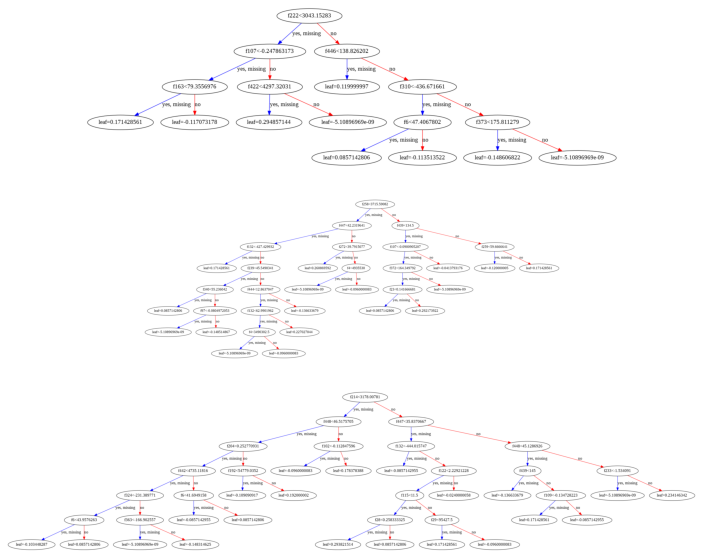

In [16]:
fig, AX = plt.subplots(3,1,figsize=(30, 10))
for i in range(3):
    ax=AX[i]
    plot_tree(model_20, num_trees=i, ax=ax)


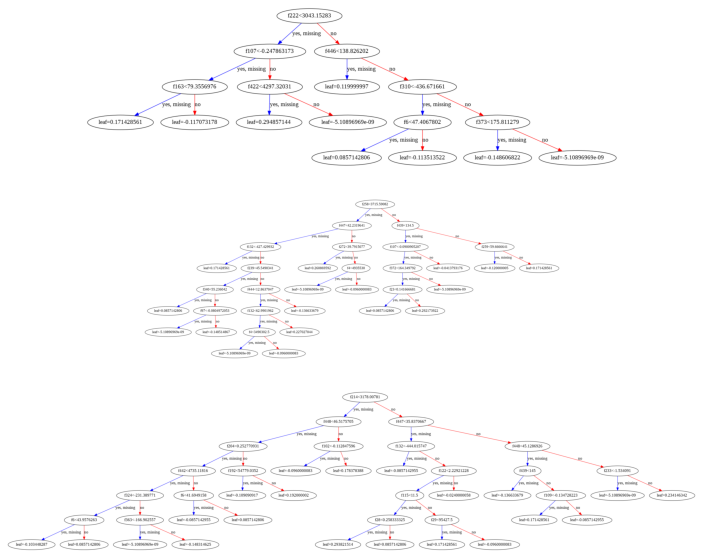

In [17]:
fig, AX = plt.subplots(3,1,figsize=(30, 10))
for i in range(3):
    ax=AX[i]
    plot_tree(model_500, num_trees=i, ax=ax)

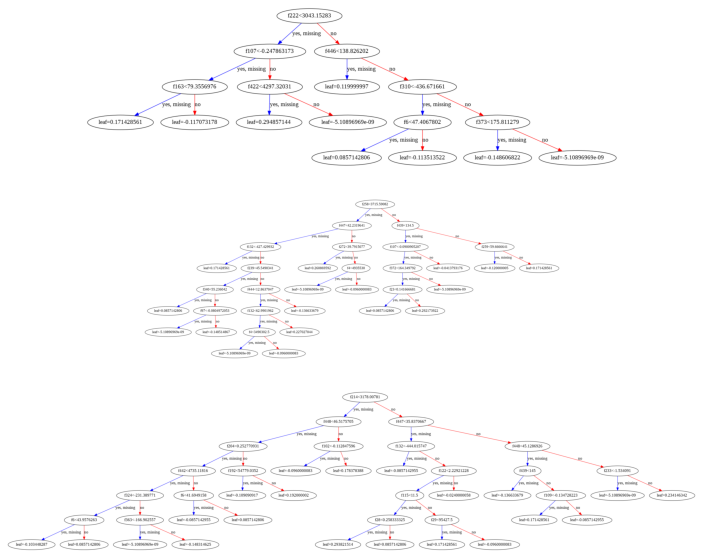

In [18]:
fig, AX = plt.subplots(3,1,figsize=(30, 10))
for i in range(3):
    ax=AX[i]
    plot_tree(model_200, num_trees=i, ax=ax)

In [19]:
x_train_100.sort_index()

,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,...,value__fourier_entropy__bins_3,value__fourier_entropy__bins_5,value__fourier_entropy__bins_10,value__fourier_entropy__bins_100,value__permutation_entropy__dimension_3__tau_1,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__mean_n_absolute_max__number_of_maxima_7
0,1.0,0.0,0.0,1.0,3245.0,1.147531e+06,41.593220,2.576271,-0.646552,70.0,...,0.239217,0.379535,0.563420,1.192692,1.739146,2.701986,3.492872,3.796177,3.911968,239.142857
1,1.0,0.0,0.0,1.0,25059.0,1.438074e+07,43.830508,10.305085,0.655172,467.0,...,0.379535,0.518700,0.563420,0.973558,1.539644,2.485559,3.099347,3.502549,3.655247,844.142857
2,1.0,0.0,0.0,1.0,61017.0,6.562040e+07,46.474576,12.644068,0.422414,940.0,...,0.283936,0.457102,0.656671,1.134027,1.714813,2.803311,3.525735,3.856101,3.911968,1432.428571
3,1.0,0.0,0.0,1.0,92584.0,1.432742e+08,32.813559,2.033898,-0.931034,1557.5,...,0.473981,0.563420,0.563420,2.116209,1.729276,2.857091,3.585825,3.906512,3.988984,1669.000000
5,1.0,0.0,0.0,1.0,74198.0,9.694334e+07,53.508475,-7.745763,0.767241,1308.5,...,0.142506,0.379535,0.379535,0.928839,1.545714,2.391944,2.980921,3.412975,3.671229,1576.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,0.0,1.0,1.0,1098852.0,2.012783e+10,52.610169,-1.220339,-0.517241,18325.5,...,0.457102,0.611952,0.793400,1.150906,1.658864,2.594745,3.238767,3.675070,3.809279,18597.285714
96,1.0,0.0,0.0,1.0,1119886.0,2.090332e+10,36.610169,5.288136,0.189655,18653.5,...,0.283936,0.424254,0.424254,1.150906,1.656240,2.589594,3.324417,3.711047,3.825262,18886.000000
97,1.0,0.0,0.0,1.0,1128443.0,2.122532e+10,46.745763,-0.406780,-0.293103,18829.5,...,0.379535,0.518700,0.563420,1.220532,1.642557,2.652253,3.321944,3.674542,3.839962,19168.714286
98,1.0,0.0,1.0,1.0,1111344.0,2.058627e+10,45.474576,-5.406780,-0.810345,18504.0,...,0.283936,0.283936,0.424254,0.973558,1.693443,2.814019,3.496467,3.821382,3.911968,18729.000000


In [20]:
x_train_20

,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,...,value__fourier_entropy__bins_3,value__fourier_entropy__bins_5,value__fourier_entropy__bins_10,value__fourier_entropy__bins_100,value__permutation_entropy__dimension_3__tau_1,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__mean_n_absolute_max__number_of_maxima_7
15,1.0,0.0,0.0,1.0,227834.0,8.670559e+08,32.593220,-8.627119,-0.879310,3787.0,...,0.239217,0.379535,0.518700,0.928839,1.714813,2.839240,3.585825,3.856101,3.927950,4063.285714
12,1.0,0.0,0.0,1.0,195675.0,6.403271e+08,35.694915,8.338983,-0.568966,3225.5,...,0.142506,0.283936,0.283936,0.424254,1.705043,2.744700,3.595169,3.856101,3.937640,3528.571429
0,1.0,0.0,0.0,1.0,16750.0,6.729150e+06,43.101695,3.576271,0.405172,289.5,...,0.283936,0.424254,0.424254,0.980757,1.606551,2.560840,3.232518,3.608440,3.809279,594.571429
10,1.0,0.0,0.0,1.0,175775.0,5.164801e+08,48.915254,-1.762712,0.767241,2893.0,...,0.239217,0.473981,0.611952,1.411818,1.697738,2.706733,3.468116,3.785405,3.860623,3275.857143
7,1.0,0.0,0.0,1.0,130625.0,2.870461e+08,53.457627,5.050847,0.232759,2141.0,...,0.283936,0.424254,0.424254,0.701390,1.763222,2.840769,3.625992,3.931717,3.988984,2623.571429
11,1.0,0.0,0.0,1.0,171731.0,4.928602e+08,46.203390,3.288136,0.310345,2864.0,...,0.379535,0.424254,0.563420,1.416696,1.623020,2.655785,3.268320,3.711047,3.886296,3112.714286
6,1.0,1.0,0.0,1.0,120965.0,2.442990e+08,39.559322,3.152542,0.318966,2030.5,...,0.550354,0.611952,0.911897,2.253535,1.577740,2.540774,3.234221,3.725480,3.902278,2129.000000
17,1.0,0.0,0.0,1.0,270892.0,1.224661e+09,47.220339,4.576271,0.060345,4573.0,...,0.283936,0.518700,0.563420,0.928839,1.510102,2.393158,3.090720,3.591198,3.834951,4705.571429
19,1.0,1.0,0.0,1.0,308829.0,1.591709e+09,46.440678,-10.067797,0.379310,5214.0,...,0.239217,0.424254,0.731802,1.698668,1.733079,2.729558,3.328929,3.649864,3.860623,5375.000000
18,1.0,0.0,0.0,1.0,301627.0,1.519905e+09,31.830508,11.050847,-0.327586,5060.0,...,0.142506,0.283936,0.283936,0.283936,1.596722,2.595327,3.198419,3.578842,3.764228,5350.142857


In [21]:
x_train_20 = x_train_20.values

In [22]:
from sklearn.metrics import accuracy_score


y_pred_train = model_500.predict(x_train_500.values)

y_pred_val = model_500.predict(x_valid_500.values)

y_pred_val_soft = model.predict_proba(x_valid_500.values)




acc_train = accuracy_score(y_train_500,y_pred_train) 
acc_val = accuracy_score(y_valid_500,y_pred_val)


print('Training accuracy:',acc_train)
print('Validation accuracy:',acc_val)

Training accuracy: 1.0
Validation accuracy: 0.91


In [26]:
############# we do not know what is the reason behind this error

#as it can be seen on cell above we did not have any errors for N = 500.


y_pred_train_20 = model_20.predict(x_train_20)

y_pred_val_20 = model_20.predict(x_valid_20)

y_pred_val_soft = model_20.predict_proba(x_valid_20)



acc_train_20 = accuracy_score(y_train_20,y_pred_train_20) 
acc_val_20 = accuracy_score(y_valid_20,y_pred_val_20)


print('Training accuracy:',acc_train_20)
print('Validation accuracy:',acc_val_20)

ValueError: ignored

In [27]:
y_pred_train_400 = model_400.predict(x_train_400)

y_pred_val_400 = model_400.predict(x_valid_400)

y_pred_val_soft = model_400.predict_proba(x_valid_400)



acc_train_400 = accuracy_score(y_train_400,y_pred_train_400) 
acc_val_400 = accuracy_score(y_valid_400,y_pred_val_400)


print('Training accuracy:',acc_train_400)
print('Validation accuracy:',acc_val_400)

ValueError: ignored

In [28]:
y_pred_train_200 = model_200.predict(x_train_200)

y_pred_val_200 = model_200.predict(x_valid_200)

y_pred_val_soft = model_200.predict_proba(x_valid_200)



acc_train_200 = accuracy_score(y_train_200,y_pred_train_200) 
acc_val_200 = accuracy_score(y_valid_200,y_pred_val_200)


print('Training accuracy:',acc_train_200)
print('Validation accuracy:',acc_val_200)

ValueError: ignored

In [ ]:
#this is the actual model for predicting, it's more complicated, but has the same error as previous one

from sklearn.metrics import accuracy_score

for N in n:
  globals()['y_pred_train_{}'.format(N)] = globals()['model_{}'.format(N)].predict(globals()['x_train_{}'.format(N)].values)
  globals()['y_pred_valid_{}'.format(N)] = globals()['model_{}'.format(N)].predict(globals()['x_valid_{}'.format(N)])
  globals()['y_pred_valid_{}_soft'.format(N)] =  globals()['model_{}'.format(N)].predict_proba(globals()['x_valid_{}'.format(N)])


  globals()['acc_train_{}'.format(N)] = accuracy_score(globals()['y_train_{}'.format(N)],globals()['y_pred_train_{}'.format(N)] )
  globals()['acc_valid_{}'.format(N)] = accuracy_score(globals()['y_valid_{}'.format(N)],globals()['y_pred_valid_{}'.format(N)] )



  print('acc_train_{} :'.format(N), globals()['acc_train_{}'.format(N)])
  print('acc_valid_{} :'.format(N), globals()['acc_valid_{}'.format(N)])
  print('_______________________________________________________________')
